<a href="https://colab.research.google.com/github/jcanevello/MIA-AlgoritmosOptimizacion/blob/master/Algoritmos_AG2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nombre: Jean Canevello <br>
##https://colab.research.google.com/drive/1KdGsTbI3pbVcxlExfabt7rZqMVuIyGcy?authuser=1#scrollTo=rTiqLuX2ZKuL <br>
https://github.com/jcanevello/MIA-AlgoritmosOptimizacion/blob/master/Algoritmos_AG2.ipynb



##1) Programación Dinámica. Viaje por el rio1

In [5]:
'''
Return: Dos listas de precio y ruta
Params: 
  tarifa: matriz de precios entre nodo y nodo
'''
def precios(tarifas):
  #Total de nodos
  n = len(tarifas[0])

  #creación de la tabla de precios
  precios = [[float('inf')]*n for i in [float('inf')]*n]
  ruta = [['']*n for i in ['']*n]

  #recorre hasta la penultima fila porque los nodos no son bidireccional
  for i in range(n-1): 
    #empieza de i+1 porque los nodos no son cíclicos
    for j in range(i+1, n):
      precio_min = tarifas[i][j]
      ruta[i][j] = i

      #calcula el menor precio hasta el nodo j
      for k in range(i,j):
        if precios[i][k] + tarifas[k][j] < precio_min:
          precio_min = min(precio_min, precios[i][k] + tarifas[k][j])
          ruta[i][j] = k
        precios[i][j] = precio_min

  return precios, ruta

def calcular_ruta(ruta, desde, hasta):
  if desde == hasta:
    return desde
  else:
    return str(calcular_ruta(ruta, desde, ruta[desde][hasta])) + ',' + str(ruta[desde][hasta])

def calcular_ruta2(m_ruta, desde, hasta):

  ruta = [hasta]
  while desde != hasta:
    nodo_ant = m_ruta[desde][hasta]
    ruta.insert(0, nodo_ant)
    hasta = nodo_ant

  return ','.join(map(str, ruta))

tarifas = [
    [0,5,4,3,float('inf'),float('inf'),float('inf')],
    [float('inf'),0,float('inf'),2,3,float('inf'),11],
    [float('inf'),float('inf'),0,1,float('inf'),4,10],
    [float('inf'),float('inf'),float('inf'),0,5,6,9],
    [float('inf'),float('inf'),float('inf'),float('inf'),0,float('inf'),4],
    [float('inf'),float('inf'),float('inf'),float('inf'),float('inf'),float('inf'),0]
]

precios, ruta = precios(tarifas)

print("PRECIOS")
for i in range(len(tarifas)):
  print(precios[i])

print("\nRUTA")  
for i in range(len(tarifas)):
  print(ruta[i]) 

print(f'\nLa ruta de menor costo es: {calcular_ruta2(ruta, 0, 6)}')


PRECIOS
[inf, 5, 4, 3, 8, 8, 8]
[inf, inf, inf, 2, 3, 8, 7]
[inf, inf, inf, 1, 6, 4, 4]
[inf, inf, inf, inf, 5, 6, 6]
[inf, inf, inf, inf, inf, inf, 4]
[inf, inf, inf, inf, inf, inf, 0]

RUTA
['', 0, 0, 0, 1, 2, 5]
['', '', 1, 1, 1, 3, 4]
['', '', '', 2, 3, 2, 5]
['', '', '', '', 3, 3, 5]
['', '', '', '', '', 4, 4]
['', '', '', '', '', '', 5]

La ruta de menor costo es: 0,2,5,6


##2) Problema de Asignacion de tarea

In [6]:
#Asignacion de tareas - Ramificación y Poda
################################################################################
#    T A R E A 
#   A
#   G
#   E
#   N
#   T
#   E

COSTES=[[11,12,18,40],
        [14,15,13,22],
        [11,17,19,23],
        [17,14,20,28]]

#Calculo del valor de una solucion parcial
def valor(S,COSTES):
  VALOR = 0
  for i in range(len(S)):
    VALOR += COSTES[S[i]][i] 
  return VALOR

valor((3,2,  ),COSTES)

34

In [7]:
#Coste inferior para soluciones parciales
#  (1,3,) Se asigna la tarea 1 al agente 0 y la tarea 3 al agente 1

def CI(S,COSTES):
  VALOR = 0
  #Valores establecidos
  for i in range(len(S)):
    VALOR += COSTES[i][S[i]]

  #Estimacion
  for i in range( len(S), len(COSTES)   ):
    VALOR += min( [ COSTES[j][i] for j in range(len(S), len(COSTES))  ])
  return VALOR

def CS(S,COSTES):
  VALOR = 0
  #Valores establecidos
  for i in range(len(S)):
    VALOR += COSTES[i][S[i]]

  #Estimacion
  for i in range( len(S), len(COSTES)   ):
    VALOR += max( [ COSTES[j][i] for j in range(len(S), len(COSTES))  ])
  return VALOR

CI((0,1),COSTES)

68

In [8]:
#Genera tantos hijos como como posibilidades haya para la siguiente elemento de la tupla
#(0,) -> (0,1), (0,2), (0,3)
def crear_hijos(NODO, N):
  HIJOS = []
  for i in range(N ):
    if i not in NODO:
      HIJOS.append({'s':NODO +(i,)    })
  return HIJOS

crear_hijos((0,) , 4)

[{'s': (0, 1)}, {'s': (0, 2)}, {'s': (0, 3)}]

In [9]:
def ramificacion_y_poda(COSTES):
#Construccion iterativa de soluciones(arbol). En cada etapa asignamos un agente(ramas).
#Nodos del grafo  { s:(1,2),CI:3,CS:5  }
  #print(COSTES)
  DIMENSION = len(COSTES)  
  MEJOR_SOLUCION=tuple( i for i in range(len(COSTES)) )
  CotaSup = valor(MEJOR_SOLUCION,COSTES)
  #print("Cota Superior:", CotaSup)

  NODOS=[]
  NODOS.append({'s':(), 'ci':CI((),COSTES)    } )

  iteracion = 0

  while( len(NODOS) > 0):
    iteracion +=1

    nodo_prometedor = [ min(NODOS, key=lambda x:x['ci']) ][0]['s']
    #print("Nodo prometedor:", nodo_prometedor)

    #Ramificacion
    #Se generan los hijos
    HIJOS =[ {'s':x['s'], 'ci':CI(x['s'], COSTES)   } for x in crear_hijos(nodo_prometedor, DIMENSION) ]

    #Revisamos la cota superior y nos quedamos con la mejor solucion si llegamos a una solucion final
    NODO_FINAL = [x for x in HIJOS if len(x['s']) == DIMENSION  ]
    if len(NODO_FINAL ) >0: 
      #print("\n********Soluciones:",  [x for x in HIJOS if len(x['s']) == DIMENSION  ] )
      if NODO_FINAL[0]['ci'] < CotaSup:
        CotaSup = NODO_FINAL[0]['ci']
        MEJOR_SOLUCION = NODO_FINAL
 
    #Poda
    HIJOS = [x for x in HIJOS if x['ci'] < CotaSup   ]

    #Añadimos los hijos 
    NODOS.extend(HIJOS) 

    #Eliminamos el nodo ramificado
    NODOS =  [  x for x in NODOS if x['s'] != nodo_prometedor    ]
   
  print("La solucion final es:" ,MEJOR_SOLUCION , " en " , iteracion , " iteraciones" , " para dimension: " ,DIMENSION  )
      


ramificacion_y_poda(COSTES)

La solucion final es: [{'s': (1, 2, 0, 3), 'ci': 64}]  en  10  iteraciones  para dimension:  4


##3) Descenso del gradiente

In [10]:
import math                      #Funciones matematicas
import matplotlib.pyplot as plt  #Generacion de gráficos (otra opcion seaborn)
import numpy as np               #Tratamiento matriz N-dimensionales y otras (fundamental!) 
#import scipy as sc

import random

Vamos a buscar el minimo de la funcion paraboloide : $$f(x) =  x² + y²$$

Obviamente se encuentra en (x,y)=(0,0) pero probaremos como llegamos a él a través del descenso del gradiante.

In [11]:
#Definimos la funcion
#Paraboloide
f  = lambda X:      X[0]**2 + X[1]**2    #Funcion
df = lambda X: [2*X[0] , 2*X[1]]         #Gradiente
 
df([1,2])

[2, 4]

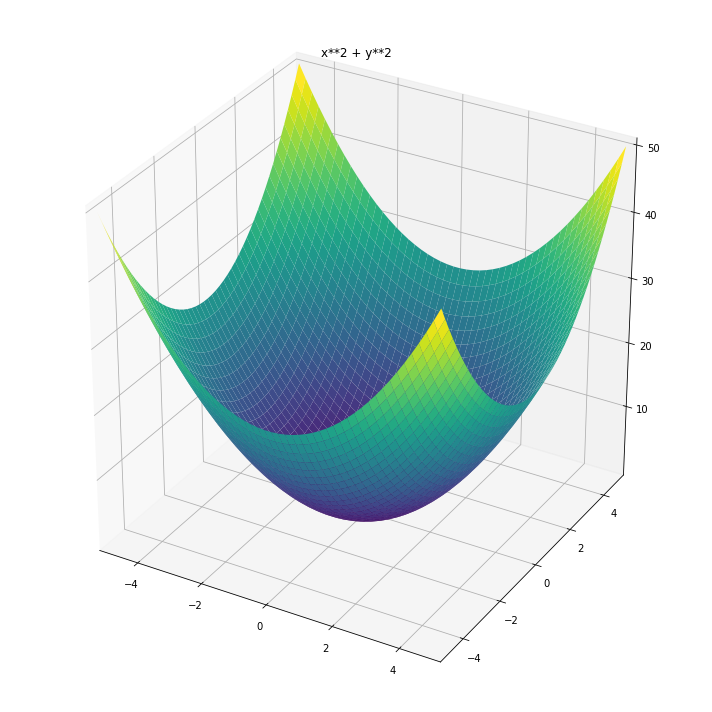

In [12]:
from sympy import symbols
from sympy.plotting import plot
from sympy.plotting import plot3d
x,y = symbols('x y')
plot3d(x**2 + y**2,
       (x,-5,5),(y,-5,5),
       title='x**2 + y**2',
       size=(10,10))

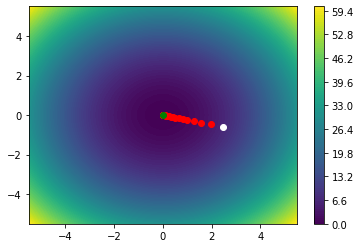

Solucion: [3.5242192297010915e-05, -8.462923615371885e-06] 1.3136331940191146e-09


In [13]:
#Prepara los datos para dibujar mapa de niveles de Z
resolucion = 100 
rango=5.5
 
X=np.linspace(-rango,rango,resolucion) 
Y=np.linspace(-rango,rango,resolucion)
Z=np.zeros((resolucion,resolucion))
for ix,x in enumerate(X):
  for iy,y in enumerate(Y):
    Z[iy,ix] = f([x,y])

#Pinta el mapa de niveles de Z
plt.contourf(X,Y,Z,resolucion)
plt.colorbar() 

#Generamos un punto aleatorio inicial y pintamos de blanco
P=[random.uniform(-5,5  ),random.uniform(-5,5 ) ]
plt.plot(P[0],P[1],"o",c="white")

#Tasa de aprendizaje. Fija. Sería más efectivo reducirlo a medida que nos acercamos.
TA=.1 

#Iteraciones:50
for _ in range(50):
  grad = df(P)
  #print(P,grad)
  P[0],P[1] = P[0] - TA*grad[0] , P[1] - TA*grad[1]
  plt.plot(P[0],P[1],"o",c="red")

#Dibujamos el punto final y pintamos de verde
plt.plot(P[0],P[1],"o",c="green")
plt.show()
print("Solucion:" , P , f(P))
